In [ ]:
#Titanic EDA Project 

#Bu çalışma, Titanic veri seti üzerinde yapılan kapsamlı bir Exploratory Data Analysis (EDA) sürecini içermektedir.
#Bu analizde veri yapısı incelenmiş, değişkenlerin dağılımları analiz edilmiş, ilişkiler görselleştirilmiş ve hayatta kalmayı etkileyen faktörler araştırılmıştır.

In [2]:
# Gerekli kütüphaneler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grafik ayarları
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("Kütüphaneler yüklendi.")


Kütüphaneler yüklendi.


In [32]:
# education.csv dosyasını okuma
# Not: education.csv dosyası notebook ile aynı klasörde olmalı
df = pd.read_csv("education.csv")

# İlk 5 satırı görüntüleme
df.head()


,Country,Year,LiteracyRate,SchoolingYears,Expenditure,Population
0,Turkey,2018,96.0,14.5,4.3,82.0
1,Turkey,2019,96.2,14.6,4.4,83.0
2,Turkey,2020,96.5,14.7,4.5,84.0
3,Germany,2018,99.0,17.0,5.0,82.9
4,Germany,2019,99.0,17.1,5.1,83.1


In [34]:
# Veri setinin detaylı bilgisi
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         15 non-null     object 
 1   Year            15 non-null     int64  
 2   LiteracyRate    15 non-null     float64
 3   SchoolingYears  15 non-null     float64
 4   Expenditure     15 non-null     float64
 5   Population      15 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 852.0+ bytes


In [36]:
# Veri setinde eksik değer var mı?
df.isnull().sum()


Country           0
Year              0
LiteracyRate      0
SchoolingYears    0
Expenditure       0
Population        0
dtype: int64

In [38]:
# Sayısal özelliklerin temel istatistikleri
df.describe()


,Year,LiteracyRate,SchoolingYears,Expenditure,Population
count,15.000000,15.000000,15.00000,15.000000,15.000000
mean,2019.000000,97.346667,15.16000,5.040000,166.213333
std,0.845154,2.288751,1.79077,0.993407,96.963792
min,2018.000000,93.000000,12.10000,3.500000,82.000000
25%,2018.000000,96.100000,14.55000,4.350000,83.150000
50%,2019.000000,99.000000,15.30000,5.100000,126.000000
75%,2020.000000,99.000000,16.65000,5.950000,210.500000
max,2020.000000,99.000000,17.20000,6.300000,331.000000


In [40]:
# Veri setindeki unique ülkeler
df['Country'].unique()


array(['Turkey', 'Germany', 'USA', 'Japan', 'Brazil'], dtype=object)

In [42]:
# Ülkelere göre ortalama okuryazarlık oranı
df.groupby("Country")["LiteracyRate"].mean()


Country
Brazil     93.500000
Germany    99.000000
Japan      99.000000
Turkey     96.233333
USA        99.000000
Name: LiteracyRate, dtype: float64

In [44]:
# Yıllara göre ortalama Eğitim Harcaması (Expenditure)
df.groupby("Year")["Expenditure"].mean()


Year
2018    4.94
2019    5.04
2020    5.14
Name: Expenditure, dtype: float64

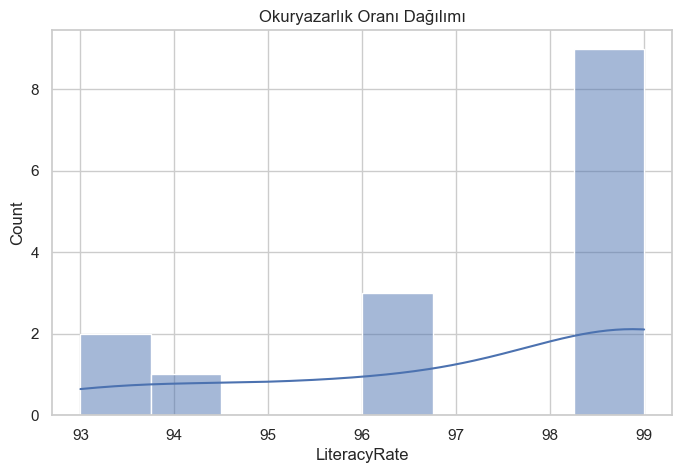

In [46]:
# LiteracyRate histogramı
plt.figure(figsize=(8,5))
sns.histplot(df["LiteracyRate"], kde=True, bins=8)
plt.title("Okuryazarlık Oranı Dağılımı")
plt.show()


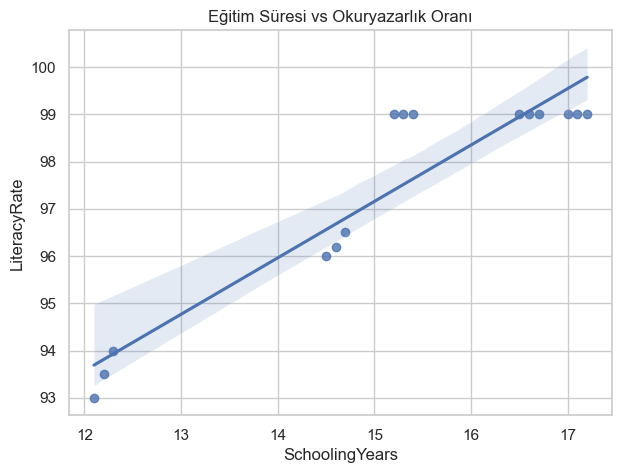

In [48]:
# Eğitim süresi ve okuryazarlık ilişkisi
plt.figure(figsize=(7,5))
sns.regplot(x="SchoolingYears", y="LiteracyRate", data=df)
plt.title("Eğitim Süresi vs Okuryazarlık Oranı")
plt.show()


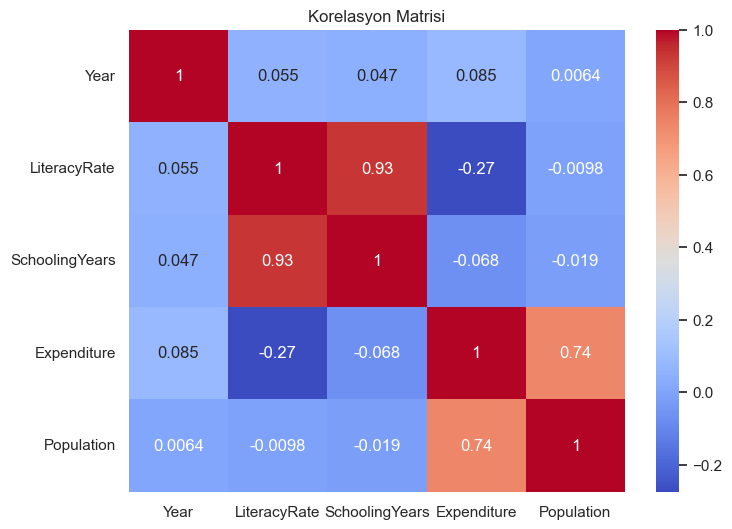

In [52]:
# Korelasyon matrisi
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()



In [54]:
# Her ülkenin ortalama değerlerini hesaplama
# Burada Country kolonuna göre grupluyoruz
# Ardından sayısal kolonların ortalamalarını alıyoruz

country_means = df.groupby("Country").mean(numeric_only=True)

# Sonucu görelim
country_means


,Year,LiteracyRate,SchoolingYears,Expenditure,Population
Country,,,,,
Brazil,2019.0,93.500000,12.2,5.9,210.000000
Germany,2019.0,99.000000,17.1,5.1,83.066667
Japan,2019.0,99.000000,15.3,3.6,126.000000
Turkey,2019.0,96.233333,14.6,4.4,83.000000
USA,2019.0,99.000000,16.6,6.2,329.000000


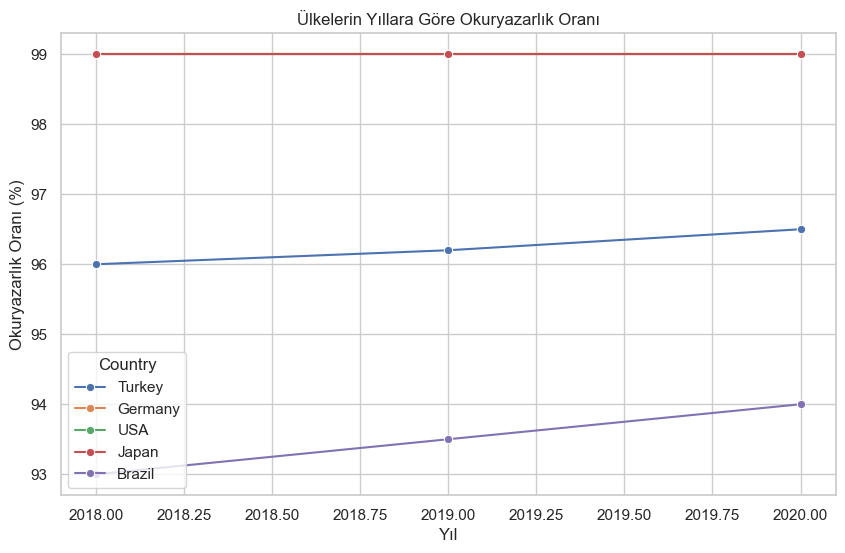

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik boyutu
plt.figure(figsize=(10,6))

# Her ülkeyi ayrı çiziyoruz
sns.lineplot(data=df, x="Year", y="LiteracyRate", hue="Country", marker="o")

# Başlık ve etiketler
plt.title("Ülkelerin Yıllara Göre Okuryazarlık Oranı")
plt.xlabel("Yıl")
plt.ylabel("Okuryazarlık Oranı (%)")

plt.grid(True)
plt.show()


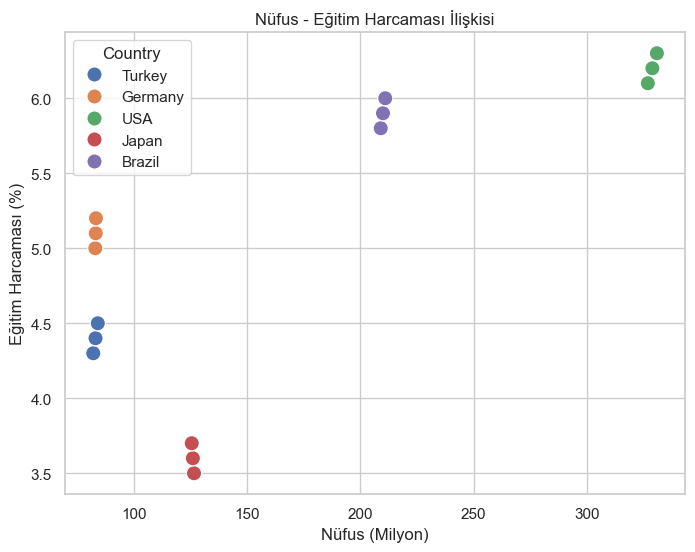

In [66]:
plt.figure(figsize=(8,6))

# Scatter plot çiziyoruz
sns.scatterplot(data=df, x="Population", y="Expenditure", hue="Country", s=120)

# Başlık ve etiketler
plt.title("Nüfus - Eğitim Harcaması İlişkisi")
plt.xlabel("Nüfus (Milyon)")
plt.ylabel("Eğitim Harcaması (%)")

plt.grid(True)
plt.show()


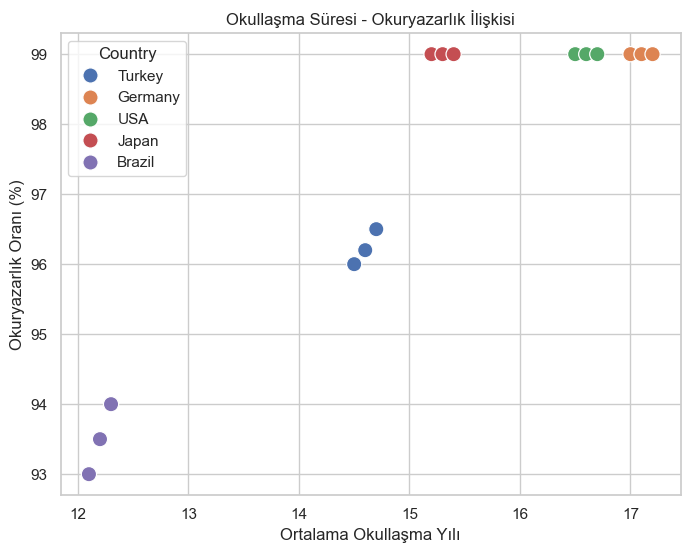

In [68]:
# ============================================
# Okullaşma Süresi ile Okuryazarlık Arasındaki İlişki
# ============================================

plt.figure(figsize=(8,6))

# Scatter plot çiziyoruz
sns.scatterplot(
    data=df,
    x="SchoolingYears",
    y="LiteracyRate",
    hue="Country",
    s=120
)

# Grafik başlığı ve eksen isimleri
plt.title("Okullaşma Süresi - Okuryazarlık İlişkisi")
plt.xlabel("Ortalama Okullaşma Yılı")
plt.ylabel("Okuryazarlık Oranı (%)")

# Arka plana grid ekleyelim (okumayı kolaylaştırır)
plt.grid(True)

plt.show()


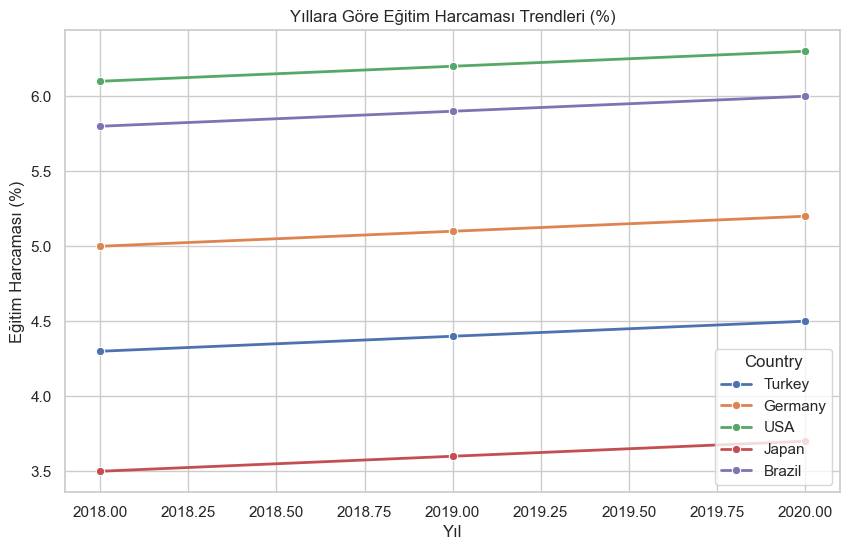

In [70]:
# ============================================
# Yıllara Göre Eğitim Harcaması Trend Analizi
# ============================================

plt.figure(figsize=(10,6))

# Line chart — ülkeleri ayrı göstermek için hue kullanıyoruz
sns.lineplot(
    data=df,
    x="Year",
    y="Expenditure",
    hue="Country",
    marker="o",      # Noktalar ekleyelim
    linewidth=2
)

# Başlık ve eksenler
plt.title("Yıllara Göre Eğitim Harcaması Trendleri (%)")
plt.xlabel("Yıl")
plt.ylabel("Eğitim Harcaması (%)")

plt.grid(True)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27072\825557771.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


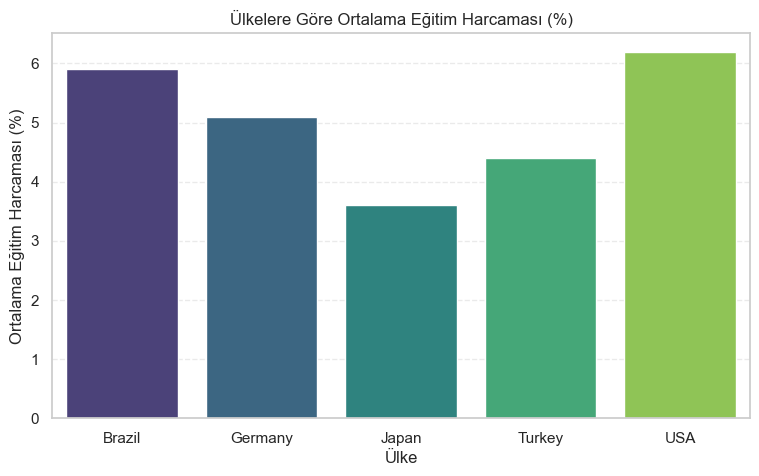

In [72]:
# ====================================================
# Ülkelere Göre Ortalama Eğitim Harcaması (Bar Plot)
# ====================================================

plt.figure(figsize=(9,5))

# Ülkelerin ortalama eğitim harcaması hesaplanıyor
mean_exp = df.groupby("Country")["Expenditure"].mean().reset_index()

# Bar plot çiziyoruz
sns.barplot(
    data=mean_exp,
    x="Country",
    y="Expenditure",
    palette="viridis"
)

plt.title("Ülkelere Göre Ortalama Eğitim Harcaması (%)")
plt.ylabel("Ortalama Eğitim Harcaması (%)")
plt.xlabel("Ülke")
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.show()


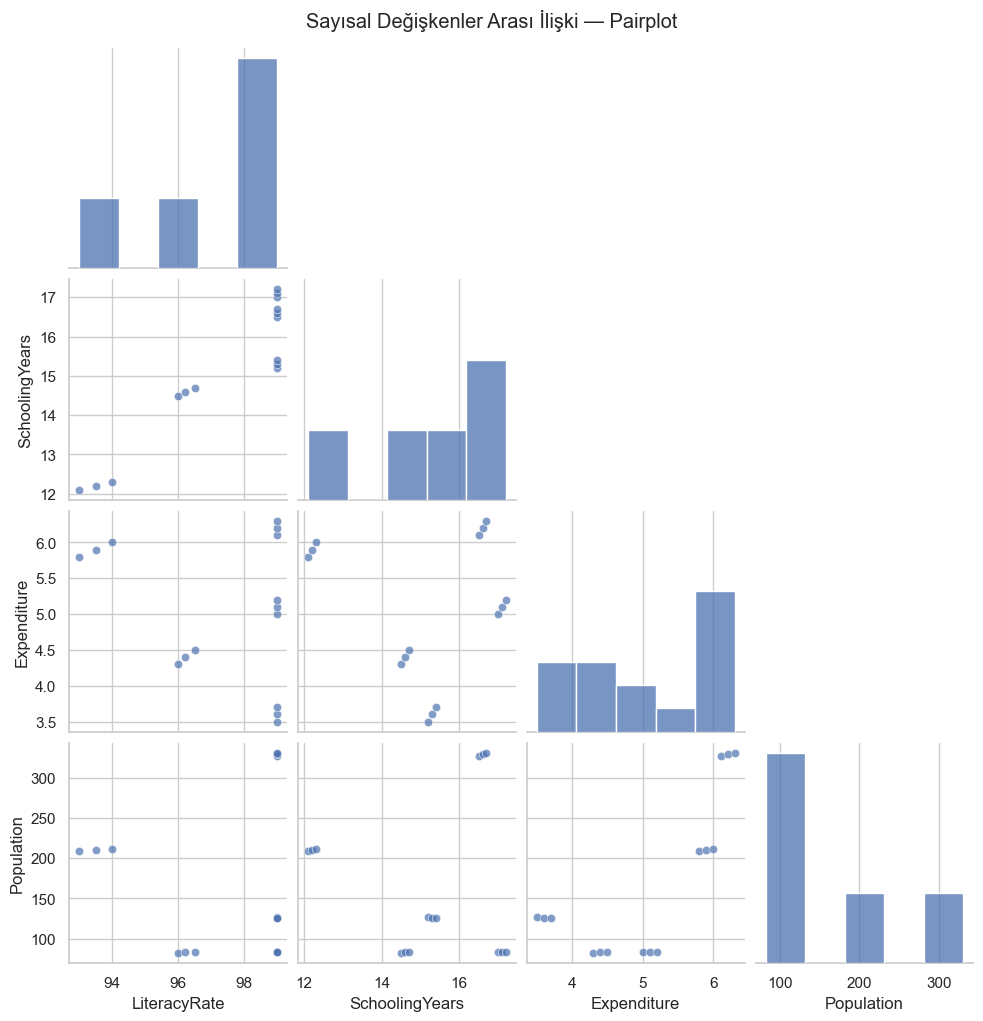

In [74]:
# ====================================================
# Çoklu İlişki Analizi — Pairplot (Scatter Matrix)
# ====================================================

# Sadece sayısal kolonları alıyoruz
num_cols = ["LiteracyRate", "SchoolingYears", "Expenditure", "Population"]

# Pairplot çizimi
sns.pairplot(df[num_cols], diag_kind="hist", corner=True, plot_kws={"alpha": 0.7})

plt.suptitle("Sayısal Değişkenler Arası İlişki — Pairplot", y=1.02)
plt.show()


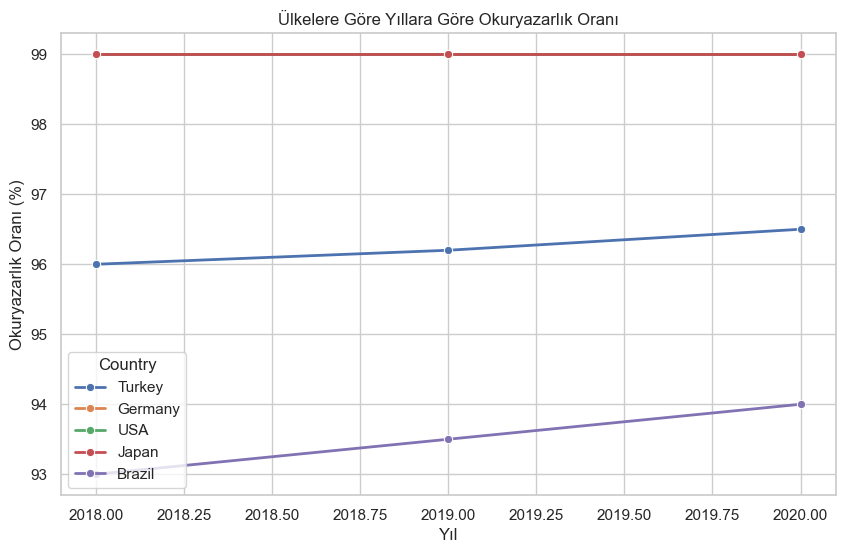

In [76]:
# ====================================================
# Ülkelere Göre Okuryazarlık Oranının Yıllara Göre Değişimi (Line Plot)
# ====================================================

plt.figure(figsize=(10,6))

sns.lineplot(data=df, x="Year", y="LiteracyRate", hue="Country", marker="o", linewidth=2)

plt.title("Ülkelere Göre Yıllara Göre Okuryazarlık Oranı")
plt.xlabel("Yıl")
plt.ylabel("Okuryazarlık Oranı (%)")

plt.grid(True)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27072\1463093918.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y="Expenditure", palette="Set2")


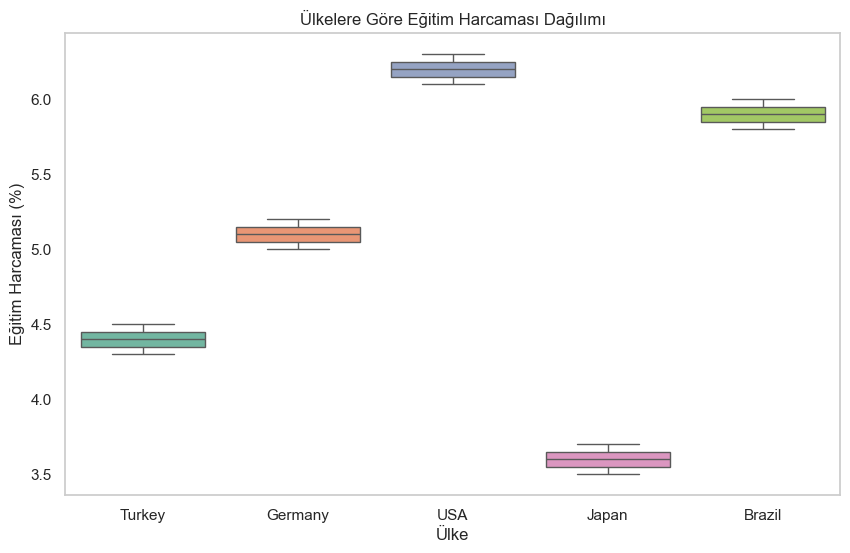

In [78]:
# ====================================================
# Ülkelere Göre Eğitim Harcaması Dağılımı — Box Plot
# ====================================================

plt.figure(figsize=(10,6))

sns.boxplot(data=df, x="Country", y="Expenditure", palette="Set2")

plt.title("Ülkelere Göre Eğitim Harcaması Dağılımı")
plt.xlabel("Ülke")
plt.ylabel("Eğitim Harcaması (%)")

plt.grid(axis="y")
plt.show()


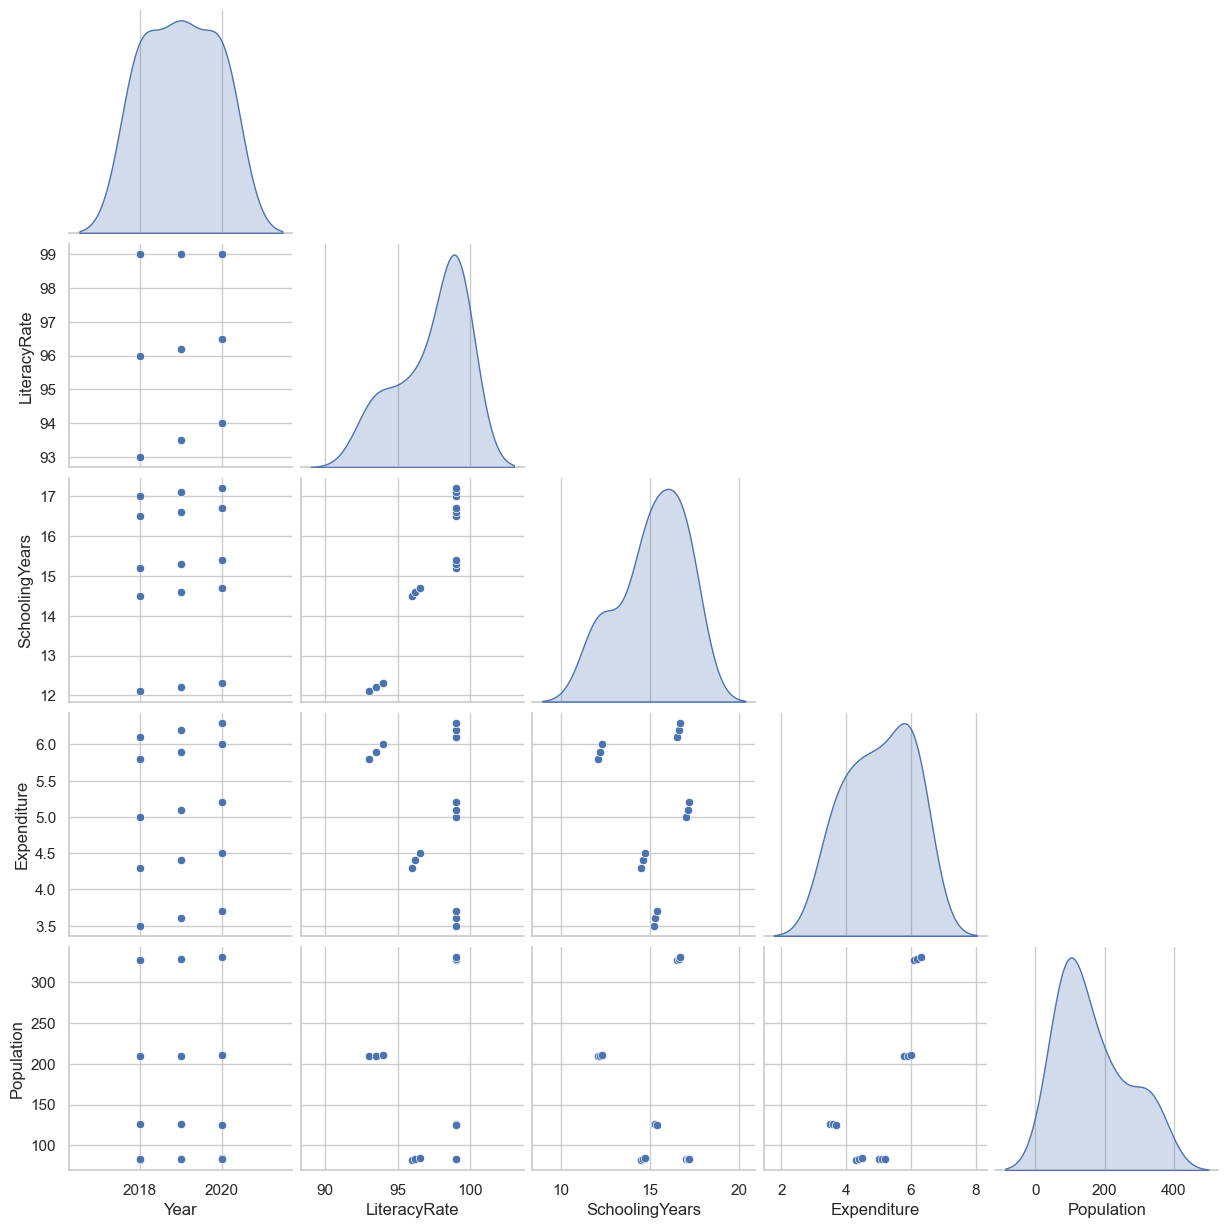

In [80]:
# ============================================================
# Adım 21 — Pairplot (çoklu değişken ilişkisi)
# ============================================================

# Sadece sayısal sütunları seçiyoruz
numeric_df = df.select_dtypes(include=["float64", "int64"])

import seaborn as sns
sns.pairplot(numeric_df, diag_kind="kde", corner=True)
plt.show()
